In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
import tabulate as tb

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes  import BernoulliNB 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

from sklearn.metrics import f1_score



In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\employee attrition project\Employee_attrition.csv")


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Data Preprocessing**

In [4]:
#Checking the datatypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
#checking for null values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#checking for duplicate values
df.duplicated().sum()

0

In [7]:
#Dropping the columns EmployeeCount,EmployeeNumber,Over18,StandardHours,MaritalStatus
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours','MaritalStatus'],axis=1,inplace=True)

In [8]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [9]:
df.shape

(1470, 30)

**Exploratory Data Analysis**

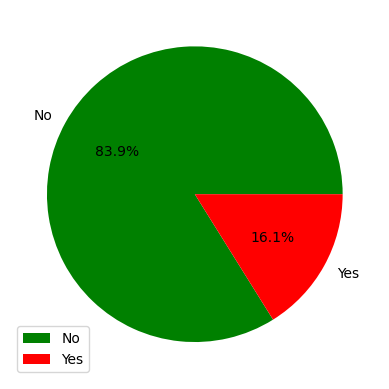

In [10]:
#checking the attrition rate using pie chart
y=df['Attrition'].value_counts()
colors=['green','red']
labels=['No','Yes']
plt.pie(y,labels=labels,colors=colors,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

From this pie chart we can see that the percentage of Attrition rate is comparitively less. **16.1%** is the attrition rate

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10704\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

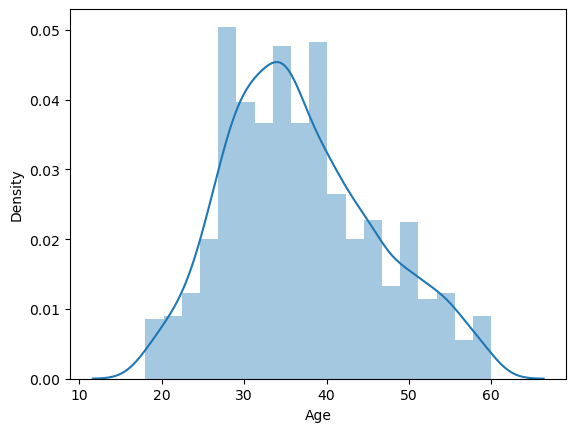

In [11]:
sns.distplot(df['Age'])

From this plot it is visible that most of the workforce lies between the Age group of **30 to 40**

<Axes: xlabel='Department', ylabel='count'>

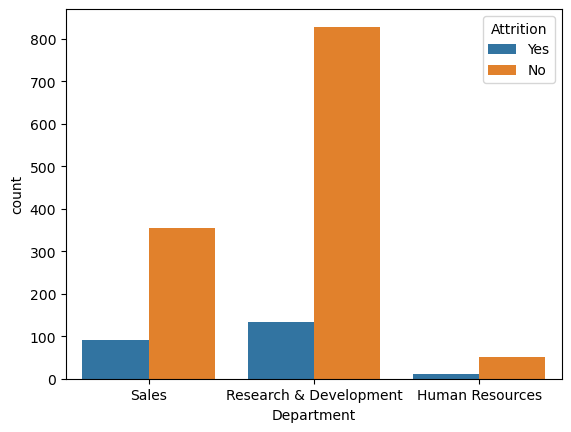

In [12]:
#Checking the Department in which attrition rate is huge
sns.countplot(x='Department',data=df,hue='Attrition')

The Attrition Rate is more in the **Research and Development Department**. whereas the Attrition Rate is very Less in the **HR department**

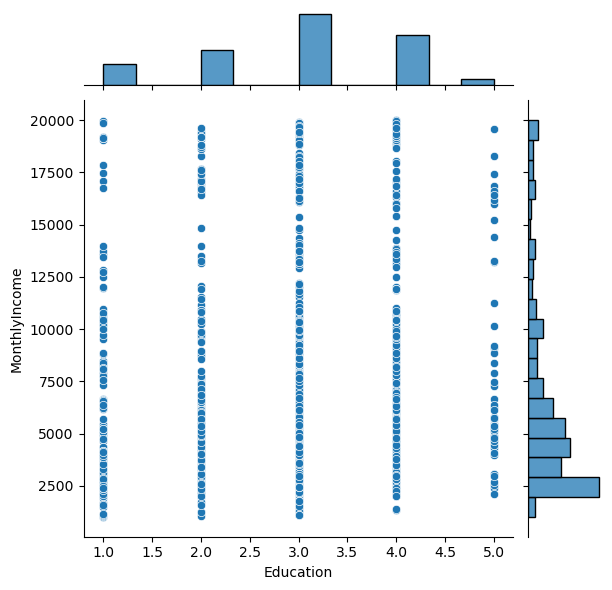

In [13]:
#checking the daily rate according to education
sns.jointplot(x='Education',y='MonthlyIncome',data=df)

From this plot we can see that more number of **graduates** becomes a huge part of the workforce.

<Axes: xlabel='Age', ylabel='count'>

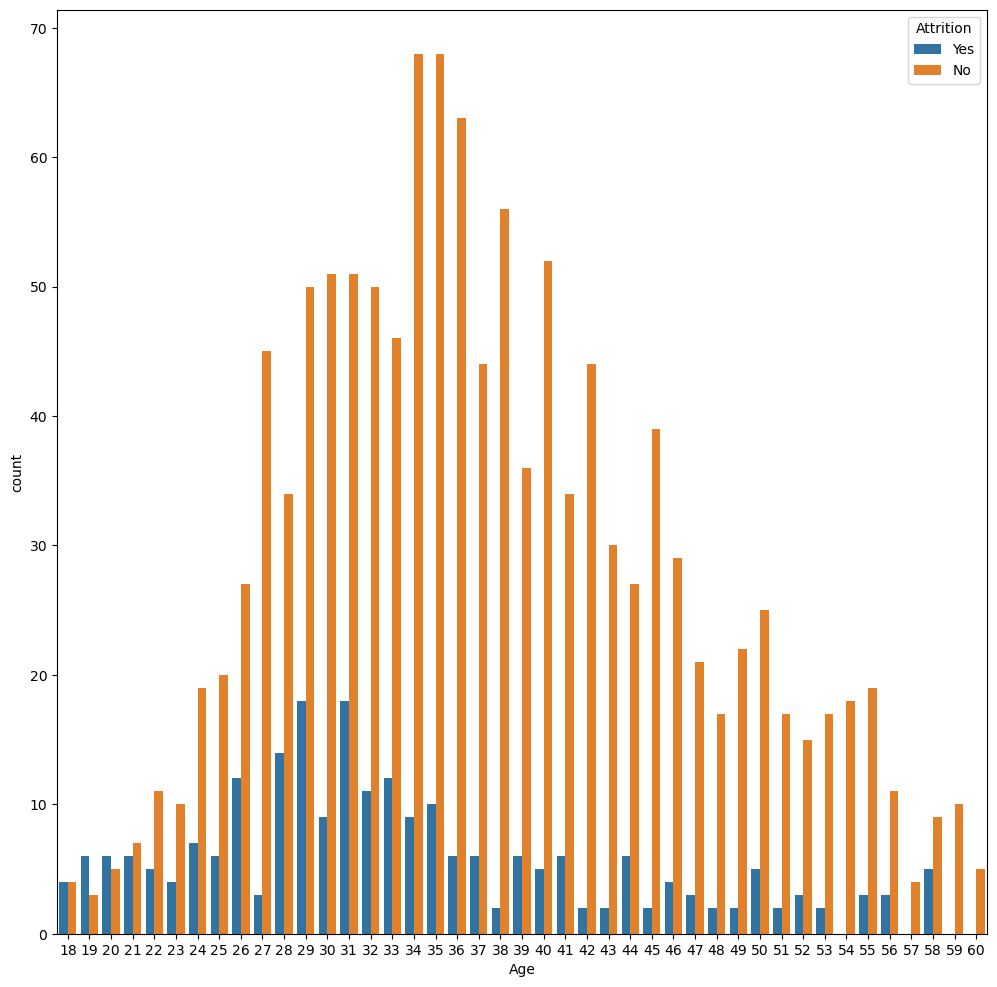

In [14]:
#checking which age group leaves the company 
fig, ax = plt.subplots(figsize=(12,12))
sns.countplot(x='Age',data=df,hue='Attrition',ax=ax)

Here we can see that the Attrition rate is more for people in the Age group **29** to **31**.

<Axes: xlabel='Gender', ylabel='count'>

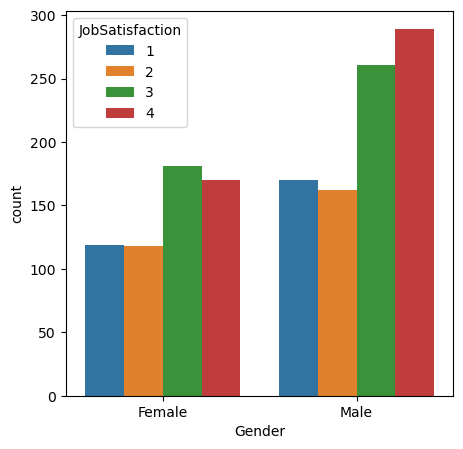

In [15]:
fig,ax=plt.subplots(figsize=(5, 5))
sns.countplot(x='Gender',data=df,hue='JobSatisfaction',ax=ax)

<Axes: xlabel='Gender', ylabel='count'>

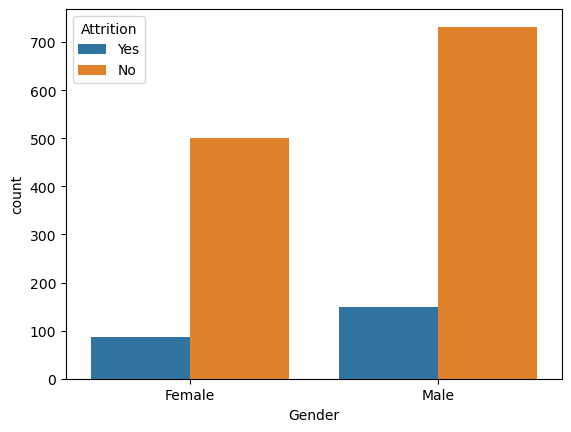

In [16]:
sns.countplot(x='Gender',data=df,hue='Attrition')

The Attrition rate among **Males** is More than Females.

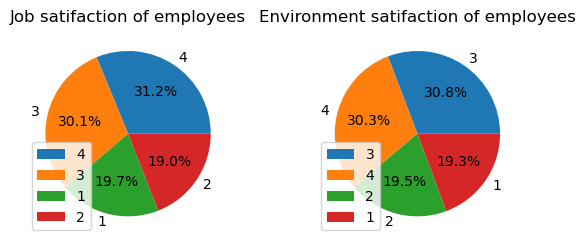

In [17]:
y=df['JobSatisfaction'].value_counts()
labels=['4','3','1','2']
plt.subplot(1,2,1)
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Job satifaction of employees')

y=df['EnvironmentSatisfaction'].value_counts()
labels=['3','4','2','1']
plt.subplot(1,2,2)
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Environment satifaction of employees')

plt.subplots_adjust(wspace=0.4)
plt.show()

The rating of Job Satisfaction among the employees is 4 only **19.1%** are dissatisfied with their job

Thr rating of work environment satifaction is 3 only **19.3%** are dissatisfied with the work Environment.

We can understand that More number of employees are satisfied or partially satisfied with the work environment and job

In [18]:
df.sort_values(by='YearsAtCompany',ascending=False).head(10)[['YearsAtCompany','PercentSalaryHike','PerformanceRating']]

,YearsAtCompany,PercentSalaryHike,PerformanceRating
126,40,12,3
98,37,13,3
1116,36,21,4
270,36,14,3
561,34,11,3
237,33,18,3
962,33,11,3
190,33,14,3
914,33,15,3
1111,33,16,3


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10704\1862983642.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='YearsAtCompany',y='PercentSalaryHike',data=df,ci=None)


<Axes: xlabel='YearsAtCompany', ylabel='PercentSalaryHike'>

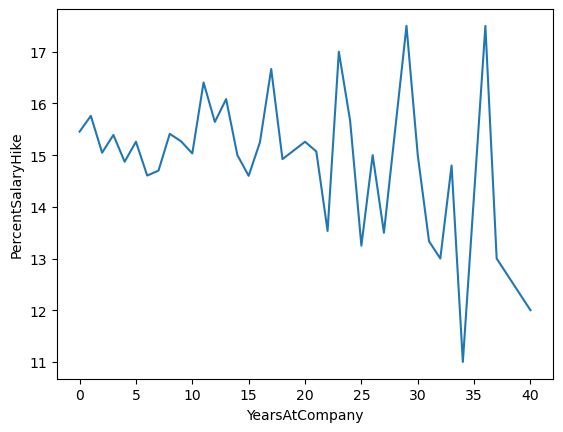

In [19]:
sns.lineplot(x='YearsAtCompany',y='PercentSalaryHike',data=df,ci=None)

From this plot we can see that the percentage of salary hike does not depend on number of years. So we also check the performance scale of employees with Highest salary hike

<Axes: xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

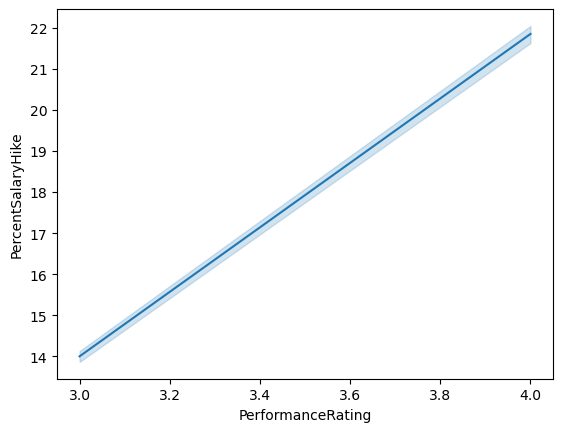

In [20]:
sns.lineplot(x='PerformanceRating',y='PercentSalaryHike',data=df)

Here we can see that the percentage of hike in salary only depends upon Performance of the Employee.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10704\682108079.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


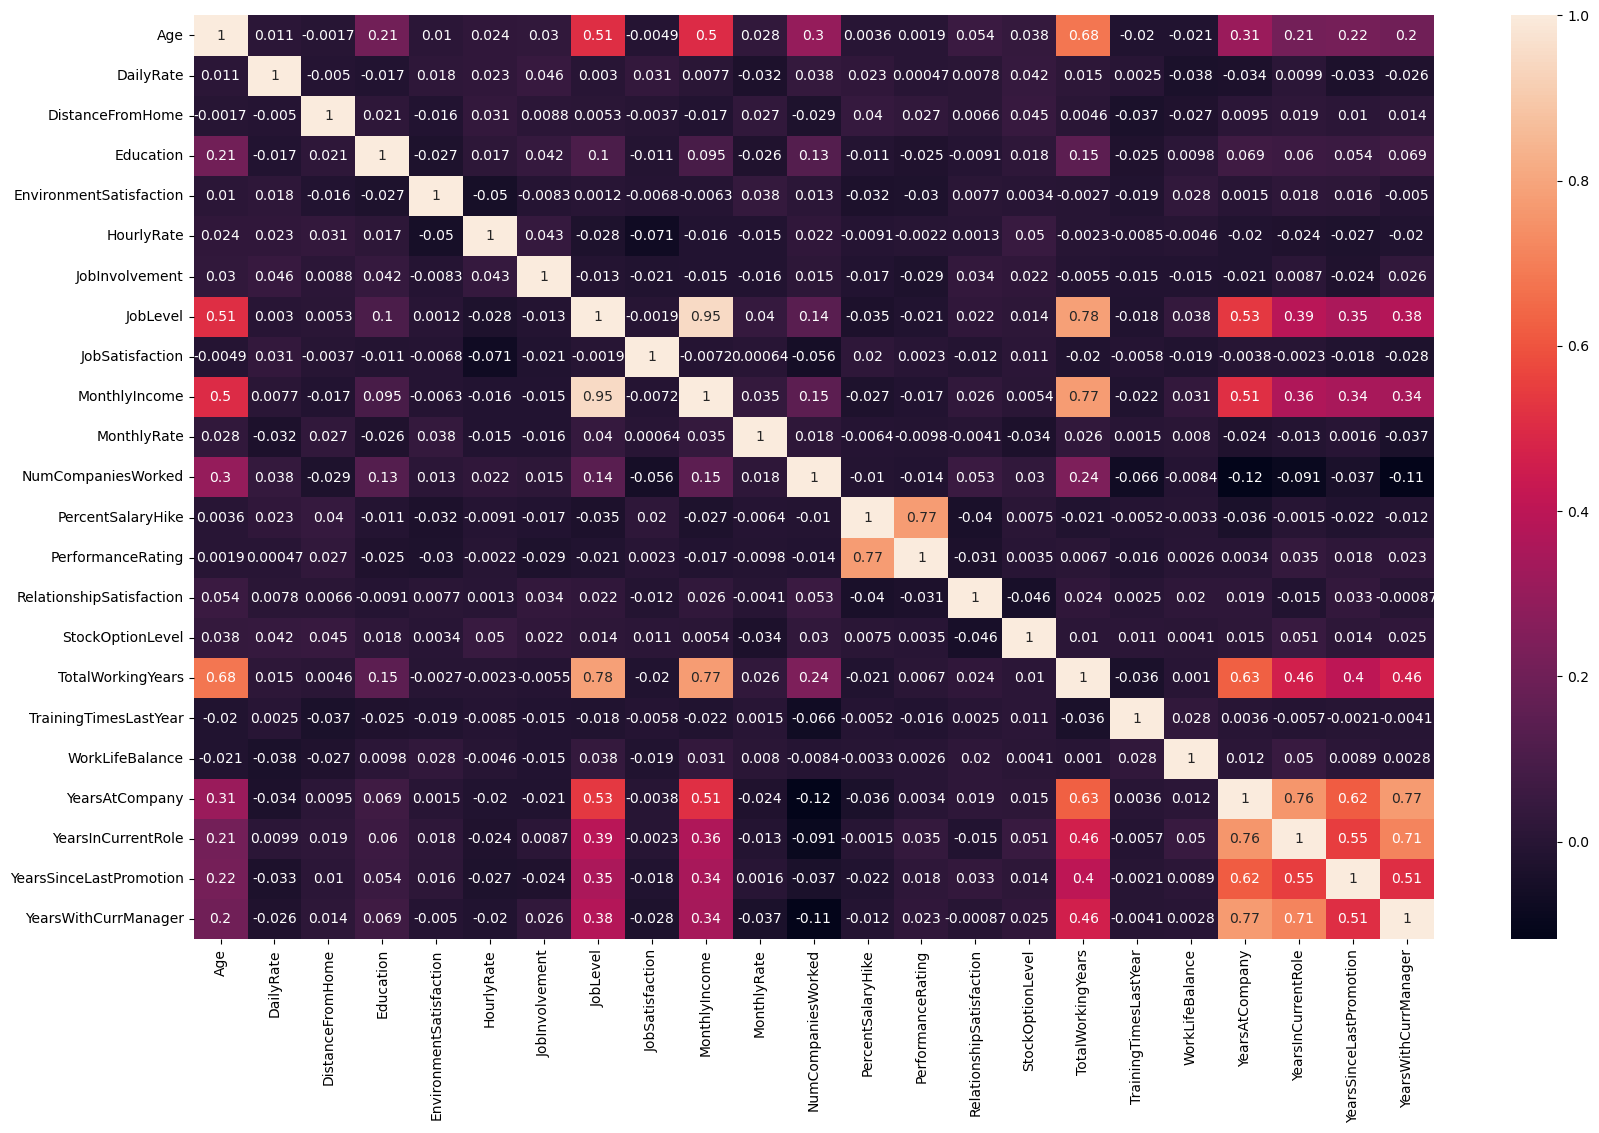

In [21]:
fig, ax = plt.subplots(1,1, figsize = (20,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

**KEY FINDINGS**

From the pie chart we can see that the percentage of Attrition rate is comparitively less. **16.1%** is the attrition rate

It is visible that most of the workforce lies between the Age group of **30 to 40**

The Attrition Rate is more in the **Research and Development Department**. whereas the Attrition Rate is very Less in the **HR department**

we can see that more number of **graduates** becomes a huge part of the workforce.

The Attrition rate is more for people in the Age group **29 to 31**.

The Attrition rate among **Males** is More than Females.

The rating of Job Satisfaction among the employees is 4 only **19.1%** are dissatisfied with their job

The rating of work environment satifaction is 3 only **19.3%** are dissatisfied with the work Environment.

We can understand that More number of employees are satisfied or partially satisfied with the work environment and job

The percentage of salary hike does not depend on number of years. So we also check the performance scale of employees with Highest salary hike.

the percentage of hike in salary only depends upon Performance of the Employee.

In [22]:
le=LabelEncoder()
lst=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','OverTime']
for i in lst:
  df[i]=le.fit_transform(df[i])
     

In [23]:
X=df.drop(['Attrition'],axis=1)
y=df.iloc[:,1]

In [24]:
X.dtypes

Age                         int64
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [25]:
ms=MinMaxScaler()
X_sc=ms.fit_transform(X)    

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.5,random_state=1)

******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       614
           1       0.67      0.12      0.20       121

    accuracy                           0.84       735
   macro avg       0.76      0.55      0.56       735
weighted avg       0.82      0.84      0.80       735

____________________________________________________________________________________________________
******************** GaussianNB() ********************
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       614
           1       0.50      0.51      0.51       121

    accuracy                           0.84       735
   macro avg       0.70      0.71      0.70       735
weighted avg       0.84      0.84      0.84       735

____________________________________________________________________________________________________
******************** SVC

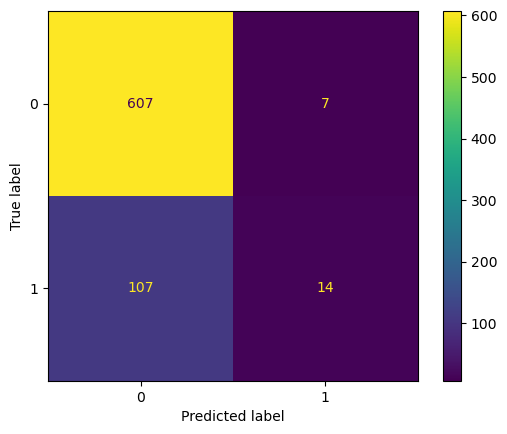

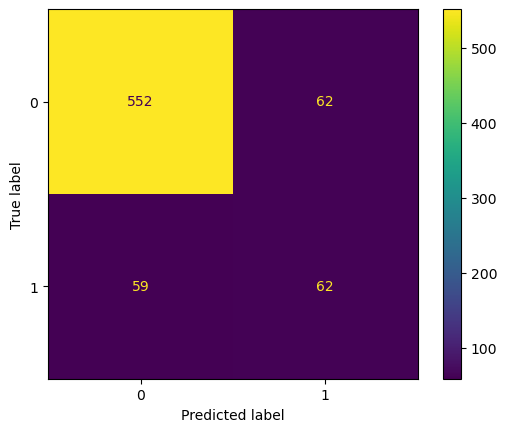

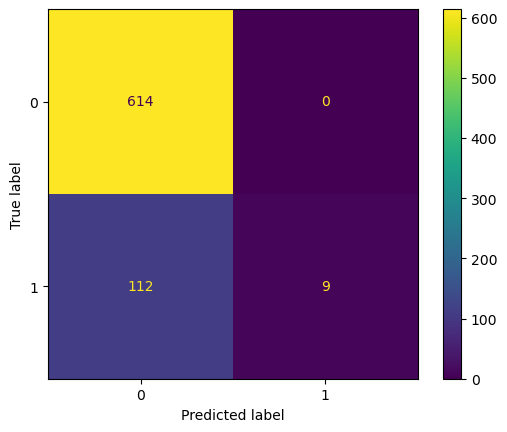

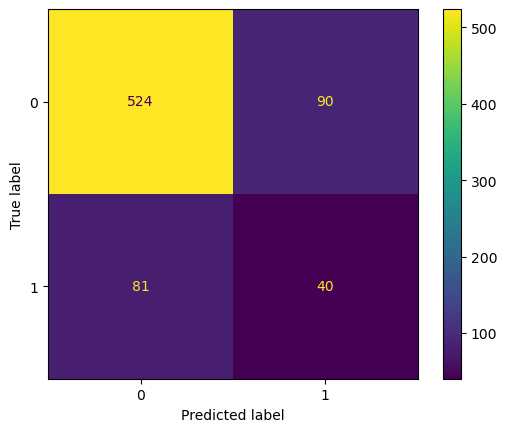

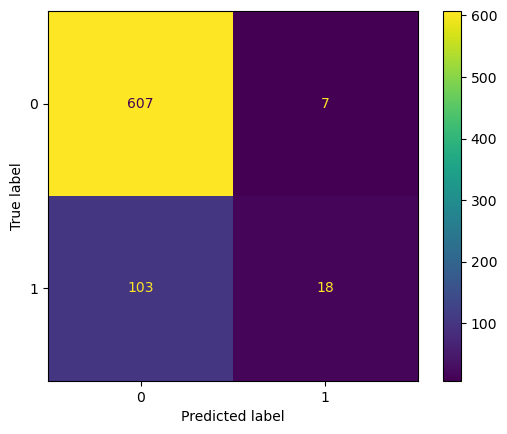

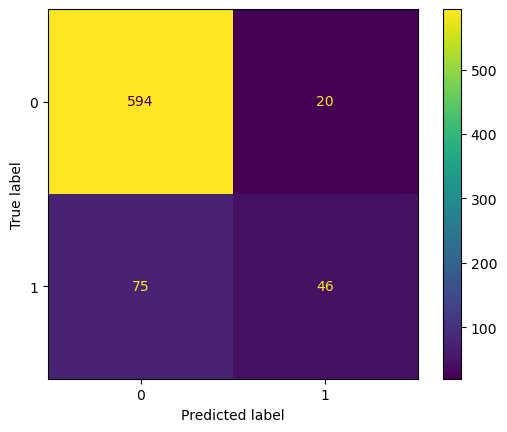

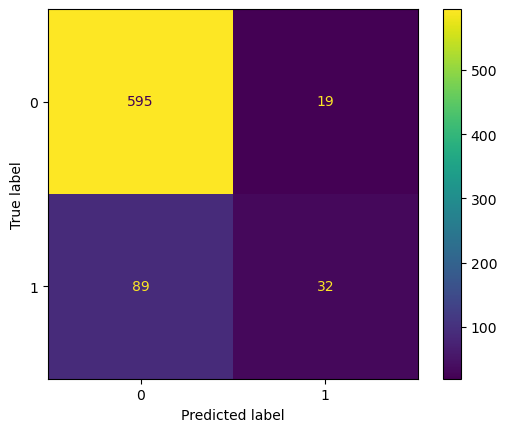

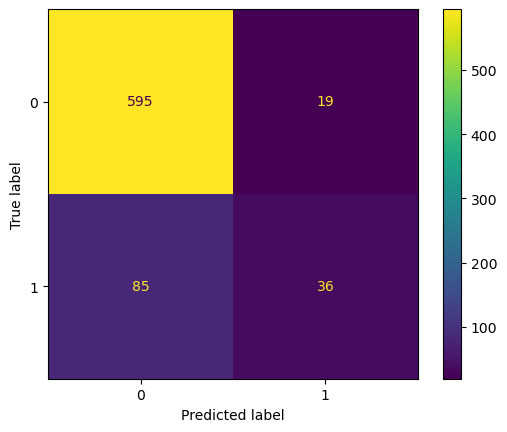

In [27]:
from pandas._libs.tslibs.offsets import MonthEnd
Knn=KNeighborsClassifier(n_neighbors=5)
nb=GaussianNB()
sv=SVC()
dt=DecisionTreeClassifier()
rs=RandomForestClassifier(n_estimators=50)
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
models=[Knn,nb,sv,dt,rs,ad,gb,xgb]

for model in models:
  print("*"*20,model,"*"*20)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print("_"*100)

From here we can see that AdaBoost classifier Has the highest Accuracy among all the other classifier Algorithms.

In [38]:
# Initialize the models
models = {'LogisticRegression': LogisticRegression(),
          'Decision Tree' : DecisionTreeClassifier(),
'Random Forest': RandomForestClassifier(n_estimators=50),
          'AdaBoostingClassifier': AdaBoostClassifier(learning_rate=0.5,n_estimators=100),
          'KNNClassifier':KNeighborsClassifier(n_neighbors=5),
         'SVM':SVC(),
         'Naive-BayesClassifier':BernoulliNB(alpha =0)}

# Initialize an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Model', 'Confusion Matrix', 'Accuracy Score', 'Precision Score', 'Recall Score' ])

# Loop through the models
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train,y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the evaluation metrics
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)*100
    prec = precision_score(y_test, y_pred)*100
    rec = recall_score(y_test, y_pred)*100
    f1 = f1_score(y_test, y_pred)*100

    # Add the results to the dataframe
    results_df = results_df.append({'Model': model_name,
                                    'Confusion Matrix': cm,
                                    'Accuracy Score': acc,
                                    'Precision Score': prec,
                                    'Recall Score': rec,
                                   'F1_Score' : f1 }, ignore_index=True)

# Print the results
print(tb.tabulate(results_df.sort_values('Accuracy Score',ascending=False), headers = 'keys' , tablefmt = 'fancy_grid'))


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10704\1030475863.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10704\1030475863.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10704\1030475863.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,


╒════╤═══════════════════════╤════════════════════╤══════════════════╤═══════════════════╤════════════════╤════════════╕
│    │ Model                 │ Confusion Matrix   │   Accuracy Score │   Precision Score │   Recall Score │   F1_Score │
╞════╪═══════════════════════╪════════════════════╪══════════════════╪═══════════════════╪════════════════╪════════════╡
│  3 │ AdaBoostingClassifier │ [[602  12]         │          87.8912 │           78.5714 │       36.3636  │    49.7175 │
│    │                       │  [ 77  44]]        │                  │                   │                │            │
├────┼───────────────────────┼────────────────────┼──────────────────┼───────────────────┼────────────────┼────────────┤
│  6 │ Naive-BayesClassifier │ [[589  25]         │          85.4422 │           60.9375 │       32.2314  │    42.1622 │
│    │                       │  [ 82  39]]        │                  │                   │                │            │
├────┼───────────────────────┼──

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10704\1030475863.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10704\1030475863.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10704\1030475863.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,
C:\Users\ASUS\anaconda\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C